In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_clipboard()
df.columns = ['power']

In [87]:
ftp = 287
def match_threshold(ftp, duration):
    return (-5e-16*duration**5 + 1e-12*duration**4 - 7e-10*duration**3 - 2e-07*duration**2 + 2e-05*duration + 1.1997)*ftp


for win in range(0,5*60):
    df[f'power_{win}'] = df['power'].rolling(window=win,center=True).mean() > match_threshold(ftp, win)

In [91]:
df[1235:1275][['power','power_28']]

,power,power_28
1235,222,False
1236,226,False
1237,234,False
1238,229,False
1239,227,False
1240,223,False
1241,218,False
1242,203,False
1243,193,False
1244,225,False


In [90]:
df[1235:1275][df.columns[20:40]]

,power_19,power_20,power_21,power_22,power_23,power_24,power_25,power_26,power_27,power_28,power_29,power_30,power_31,power_32,power_33,power_34,power_35,power_36,power_37,power_38
1235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1242,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


(1696.5, -0.5)

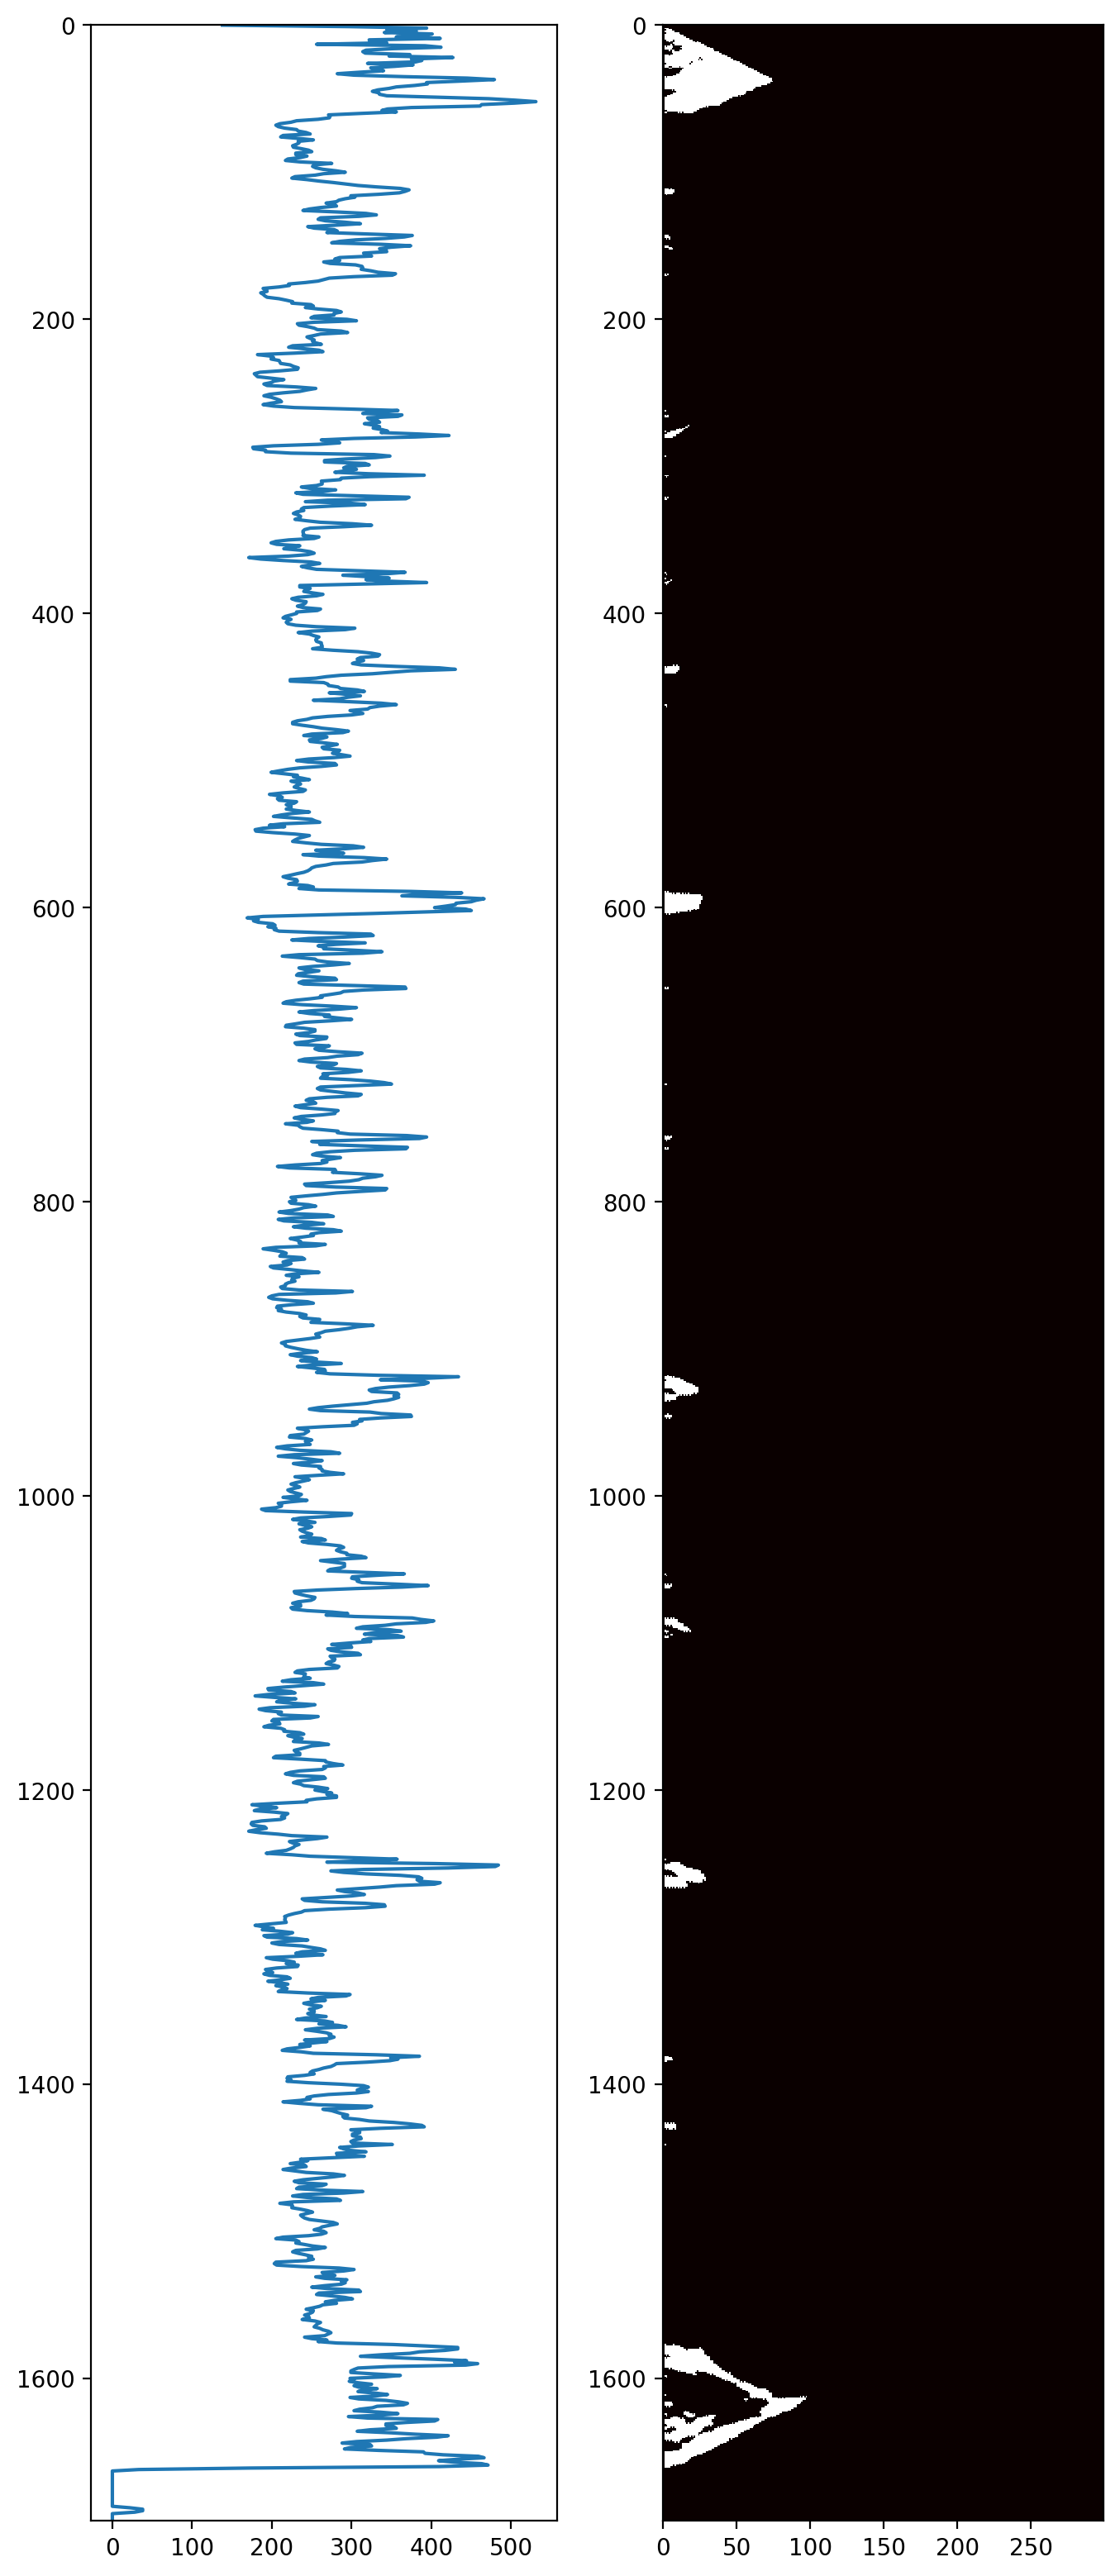

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,20), dpi=200)
ax2.imshow(df[df.columns[1:]], cmap='hot', interpolation='nearest')
ax1.plot(df['power'],df.index)
ax1.set_ylim(ax2.get_ylim())

## Plot just super-threshold

In [127]:
power = df['power']
lead_in = 10
lap_time = 60*2+45

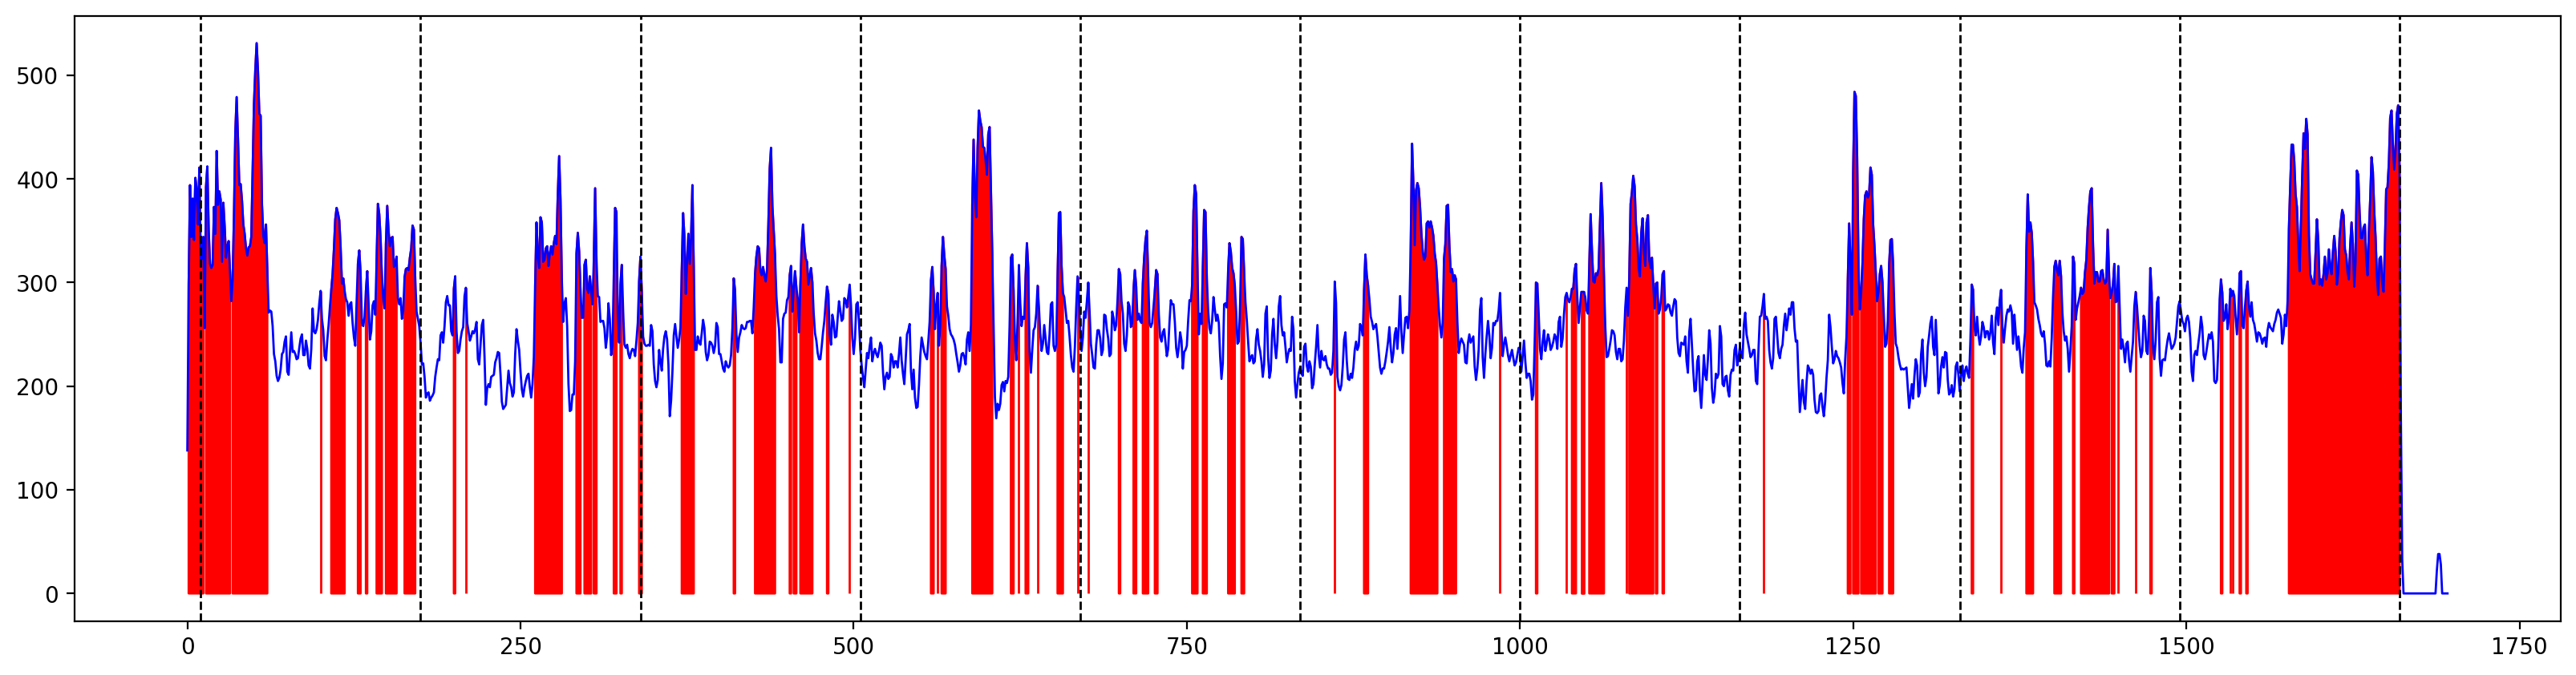

In [128]:
fig, ax = plt.subplots(1,1, figsize=(20,5), dpi=200)
ax.plot(power, lw=1, color='blue', label='power')
ax.fill_between(power.index, power, 0, where=power>ftp, lw=1, color='red', label='matches')
for lap in range(0,11):
    ax.axvline(lead_in+lap_time*lap, ls='--',lw=1, color='black')